# Tarjetas

dataset: https://docs.google.com/spreadsheets/d/1E2QvH18DyNDw1eGqU40D_KHSEfSzbipV/edit?usp=sharing&ouid=115931210603772521641&rtpof=true&sd=true


In [192]:
import pandas as pd
import numpy
#!pip install openpyxl

In [193]:
tarjetas = pd.read_csv("tarjetas.xlsx - Sheet1.csv")

In [194]:
tarjetas.head()

,Unnamed: 0,PreseTaciOn_Fecha,FeCha_de_Pago,cod_clearing,desc_creaing,NRo_Liquidacion,cod_sucursal,Cod_comercio,Cod_pagadora,Cod_marca_producto,importe_concepto
0,0,2022-06-15 00:00:00,2022-07-01 00:00:00,1009,VENTAS C/DESCUENTO CONTADO,27822,716,25107406,156,VISA CREDITO,5096.00
1,1,2022-06-15 00:00:00,2022-07-01 00:00:00,1011,VENTAS C/DTO CUOTAS FINANC. OTORG.,27822,716,25107406,156,VISA CREDITO,413500.60
2,2,2022-06-15 00:00:00,2022-07-01 00:00:00,2031,ARANCEL,27822,716,25107406,156,VISA CREDITO,7534.70
3,3,2022-06-15 00:00:00,2022-07-01 00:00:00,2040,PROMO CUOTAS AHORA 12/18,27822,716,25107406,156,VISA CREDITO,18416.85
4,4,2022-06-15 00:00:00,2022-07-01 00:00:00,2800,TOTAL DEDUCCIONES,27822,716,25107406,156,VISA CREDITO,49585.43


In [195]:
tarjetas= tarjetas.drop(tarjetas.columns[0], axis='columns')

### 1- Pasar todos los nombres de las columnas a minusculas

In [196]:
tarjetas.columns = map(str.lower, tarjetas.columns)
tarjetas

,presetacion_fecha,fecha_de_pago,cod_clearing,desc_creaing,nro_liquidacion,cod_sucursal,cod_comercio,cod_pagadora,cod_marca_producto,importe_concepto
0,2022-06-15 00:00:00,2022-07-01 00:00:00,1009,VENTAS C/DESCUENTO CONTADO,27822,716,25107406,156,VISA CREDITO,5096.00
1,2022-06-15 00:00:00,2022-07-01 00:00:00,1011,VENTAS C/DTO CUOTAS FINANC. OTORG.,27822,716,25107406,156,VISA CREDITO,413500.60
2,2022-06-15 00:00:00,2022-07-01 00:00:00,2031,ARANCEL,27822,716,25107406,156,VISA CREDITO,7534.70
3,2022-06-15 00:00:00,2022-07-01 00:00:00,2040,PROMO CUOTAS AHORA 12/18,27822,716,25107406,156,VISA CREDITO,18416.85
4,2022-06-15 00:00:00,2022-07-01 00:00:00,2800,TOTAL DEDUCCIONES,27822,716,25107406,156,VISA CREDITO,49585.43
...,...,...,...,...,...,...,...,...,...,...
47275,2022-07-28 00:00:00,2022-07-29 00:00:00,2900,TOTAL LIQUIDACION,143176,519,25892918,82,VISA DEBITO,97185.50
47276,2022-07-28 00:00:00,2022-07-29 00:00:00,5104,"IVA CRED.FISC.COMERCIO S/ARANC 21,00%",143176,519,25892918,82,VISA DEBITO,166.03
47277,2022-07-28 00:00:00,2022-07-29 00:00:00,5204,RETENCION ING.BRUTOS SIRTAC,143176,519,25892918,82,VISA DEBITO,691.84
47278,2022-07-28 00:00:00,2022-07-29 00:00:00,5900,SUBTOTAL NETO DE PAGOS,143176,519,25892918,82,VISA DEBITO,97185.50


### 2-Cuantas sucursales únicas hay? ¿Cuáles?

Hay 5 sucursales. Sus codigos son :716,98,671,519,241

In [197]:
sucursales =tarjetas.cod_sucursal.unique().tolist()
len(sucursales)


5

In [198]:
sucursales


[716, 98, 671, 519, 241]

### 3- Cuantas tarjetas de crédito distitas hay? ¿Cuáles?
¿Se te ocurre un nombre mejor para esa columna?

Hay 34499 tarjetas de credito.Estas son Mastercard y Visa Credito.
La columna se podria llamar nomb_tarjeta

In [199]:
tarjetas.cod_marca_producto.value_counts()

VISA CREDITO        26935
VISA DEBITO         12231
MASTERCARD           7564
MASTERCARD DEBIT      275
MAESTRO               261
ARGENCARD              14
Name: cod_marca_producto, dtype: int64

In [200]:
visa=(tarjetas.cod_marca_producto == "VISA CREDITO").sum()
mastercard=(tarjetas.cod_marca_producto == "MASTERCARD").sum()
mastercard+visa

34499

### 4- Cuants filas y columnas hay?


In [201]:
tarjetas.shape

(47280, 10)

Hay 47280 filas y 10 columnas

### 5- ¿Cuanto suma el total de importe_concepto?


In [202]:
tarjetas.importe_concepto.sum()

4145618332.503

El importe total de todas las transacciones es de $4145618332,503

### 6- ¿Cuanto dinero se cobro por mes? Cree un lineplot para gráficarlo


In [203]:
tarjetas.fecha_de_pago=pd.to_datetime(tarjetas.fecha_de_pago)

In [204]:
tarjetas.dtypes

presetacion_fecha             object
fecha_de_pago         datetime64[ns]
cod_clearing                   int64
desc_creaing                  object
nro_liquidacion                int64
cod_sucursal                   int64
cod_comercio                   int64
cod_pagadora                   int64
cod_marca_producto            object
importe_concepto             float64
dtype: object

In [210]:
tarjetas['dia']= pd.DatetimeIndex(tarjetas['fecha_de_pago']).day

In [224]:
transc_dia=tarjetas.groupby('dia')['importe_concepto'].sum()
transc_dia

dia
1     1.473177e+08
4     1.976693e+08
5     7.024681e+08
6     1.002753e+08
7     1.116222e+08
8     1.465996e+08
11    2.870652e+08
12    2.403649e+08
13    1.227566e+08
14    1.293021e+08
15    1.469553e+08
18    2.730872e+08
19    2.219563e+08
20    1.363231e+08
21    1.431265e+08
22    1.531738e+08
25    2.727540e+08
26    2.242873e+08
27    1.235888e+08
28    1.294521e+08
29    1.354729e+08
Name: importe_concepto, dtype: float64

<AxesSubplot:xlabel='dia'>

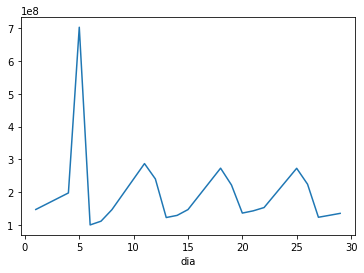

In [222]:
transc_dia.plot()

### 7- Cuanto dinero se cobro por sucursal?



In [223]:
sucursal= tarjetas.groupby("cod_sucursal")["importe_concepto"].sum()
sucursal

cod_sucursal
98     1.401451e+08
241    9.773019e+05
519    3.621125e+09
671    2.418829e+08
716    1.414878e+08
Name: importe_concepto, dtype: float64

### 8- Cuanto dinero se cobro por mes por sucursal?


In [208]:
df= tarjetas.groupby(by=["dia",'cod_sucursal'])
df.sum()['importe_concepto']

dia  cod_sucursal
1    98              3.669431e+06
     519             1.312675e+08
     671             7.608022e+06
     716             4.772726e+06
4    98              6.478613e+06
                         ...     
29   98              4.980121e+06
     241             2.472456e+04
     519             1.182347e+08
     671             6.924635e+06
     716             5.308723e+06
Name: importe_concepto, Length: 91, dtype: float64

### 9- Cuanto dinero se cobro por mes por sucursal y por descreaing?

In [227]:
nuevo_df= tarjetas.groupby(by=["dia",'cod_sucursal','desc_creaing'])['importe_concepto'].sum()
nuevo_df

dia  cod_sucursal  desc_creaing                                
1    98             PERCEPCION IVA R.G. 2408   3,00 %                  246.590
                   ARANCEL                                           13283.600
                   CRED FISCAL AHORA 12/18 VTA EN CUOTAS 10,50%       2536.308
                   CRED. FISCAL PAG.S/DTO.FIN.OTORG 21,00%             444.920
                   DESCUENTO FINANC.OTORG. CUOTAS                     2118.730
                                                                      ...     
29   716           SUBTOTAL NETO DE PAGOS                          1216257.030
                   TOTAL DEDUCCIONES                                146099.260
                   TOTAL LIQUIDACION                               1216257.030
                   VENTAS C/DESCUENTO CONTADO                       433551.900
                   VENTAS C/DTO CUOTAS FINANC. OTORG.               928804.390
Name: importe_concepto, Length: 1907, dtype: float64

### 10- Pase a columnas los valores presentes en desc_creaing y ponga los importes como valores y en el indice la fecha de pago y el codigo de comercio

In [ ]:
desc_df=tarjetas.pivot_table(index='fecha_de_pago', columns='desc_creaing',values = 'importe_concepto')

In [228]:
desc_df


desc_creaing,"PERCEPCION IVA R.G. 2408 3,00 %",AJUSTE SIRTAC JUL. 1RA QUINC,AJUSTE SIRTAC JUNIO 2DA QUINC,ARANCEL,CARGO SISTEMA CUOTAS MENS,CARGO LIQUIDACION ELECTR.,CARGO POSNET FIRSTDATA.COM.AR,CARGOS DE ENTIDAD,"CRED FISCAL AHORA 12/18 VTA EN CUOTAS 10,50%","CRED FISCAL AHORA 12/18 VTA EN CUOTAS 21,00%",...,RETENCION ING.BRUTOS,RETENCION ING.BRUTOS SIRTAC,RETENCION IVA,SERVICIO OPER. INTERNAC.,SUBTOTAL NETO DE PAGOS,TOTAL DEDUCCIONES,TOTAL LIQUIDACION,TOTAL PAGOS DE COMERCIOS,VENTAS C/DESCUENTO CONTADO,VENTAS C/DTO CUOTAS FINANC. OTORG.
fecha_de_pago,,,,,,,,,,,,,,,,,,,,,
2022-07-01,226.910635,NaN,NaN,3446.412840,NaN,NaN,NaN,NaN,1385.761961,NaN,...,6047.153656,2099.346049,4865.248385,NaN,209269.401975,23861.363889,209269.401975,NaN,114339.390543,2.474990e+05
2022-07-04,248.029500,NaN,NaN,4378.904882,NaN,NaN,NaN,NaN,1820.158449,NaN,...,7780.988617,2673.807235,6117.384706,22.5,267848.932412,30165.841529,267849.092588,27.23,146176.673094,3.194103e+05
2022-07-05,652.612727,NaN,52.356,15213.450000,11.5,NaN,NaN,52.356,6531.664391,335.710,...,26289.169510,9162.282722,22551.975202,NaN,889816.455138,106780.135722,894762.865889,13.92,420070.534362,1.041480e+06
2022-07-06,152.886939,NaN,NaN,1915.178066,11.5,NaN,21187.48,NaN,914.654329,NaN,...,3883.412500,1204.781215,4217.696162,NaN,127994.958840,13704.616298,128112.093646,10600.70,100865.359318,1.133449e+05
2022-07-07,154.974561,NaN,NaN,2385.134161,NaN,55.0,NaN,NaN,1068.296324,303.623,...,4672.764725,1524.765901,4791.083939,NaN,160630.369503,16749.329193,160630.782857,66.55,118071.152460,1.471100e+05
2022-07-08,184.242254,NaN,NaN,3032.219306,NaN,NaN,NaN,NaN,1516.413750,122.301,...,5711.565000,1521.638092,6173.055505,NaN,195579.565491,21446.250347,195579.565491,NaN,128914.462029,1.936791e+05
2022-07-11,355.530227,NaN,NaN,6231.431648,NaN,NaN,NaN,NaN,3390.071286,156.597,...,10944.390495,2843.469176,12928.903089,NaN,359657.453462,45675.179231,359657.453462,NaN,157830.315092,4.448537e+05
2022-07-12,179.268736,NaN,NaN,3450.300330,NaN,NaN,NaN,NaN,915.839653,135.167,...,9122.311667,2349.966429,4499.375037,NaN,313955.322857,21474.451154,313955.322857,NaN,351846.049424,1.124224e+05
2022-07-13,135.518209,NaN,NaN,2134.833737,NaN,NaN,NaN,NaN,931.841623,NaN,...,4044.852342,1158.357632,4013.037797,NaN,150354.508158,14712.625316,150354.508158,NaN,123050.183836,1.154951e+05


### 11- Quedarse solo con tarjeta visa. Crear una columna que sume 'VENTAS C/DESCUENTO CONTADO' con
                                'VENTAS C/DTO CUOTAS FINANC. OTORG.'

In [ ]:
visa = tarjetas["cod_marca_producto"].str.contains("VISA")
tarjeta_visa=tarjetas[visa]
#tarjeta_visa=tarjeta_visa.set_index("desc_creaing")
#tarjeta_visa=tarjeta_visa.transpose()
tarjeta_visa

In [ ]:
tarjeta_visa=tarjeta_visa.pivot_table(index='fecha_de_pago', columns='desc_creaing',values = 'importe_concepto')
tarjeta_visa

In [ ]:
tarjeta_visa.columns=tarjeta_visa.columns.str.strip()
tarjeta_visa.columns.tolist()

In [ ]:
tarjeta_visa['SUMA_imp'] = tarjeta_visa['VENTAS C/DESCUENTO CONTADO']+ tarjeta_visa['VENTAS C/DTO CUOTAS FINANC. OTORG.']
tarjeta_visa

### 12- Quedarse solo con la tarjeta mastercard y crear una columna que sea la suma de 'PERCEPCION IVA R.G. 2408   1,50 %' y  'PERCEPCION IVA R.G. 2408   3,00 %'

In [243]:
mastercard_tarjetas= tarjetas["cod_marca_producto"].str.contains("MASTERCARD")
mastercard_df=tarjetas[mastercard_tarjetas]


In [244]:
mastercard_df=tarjeta_visa.pivot_table(index='fecha_de_pago', columns='desc_creaing',values = 'importe_concepto')
mastercard_df.columns.str.strip().tolist()

['PERCEPCION IVA R.G. 2408   3,00 %',
 'AJUSTE SIRTAC JUL. 1RA QUINC',
 'AJUSTE SIRTAC JUNIO 2DA QUINC',
 'ARANCEL',
 'CARGOS DE ENTIDAD',
 'CRED FISCAL AHORA 12/18 VTA EN CUOTAS 10,50%',
 'CRED. FISCAL PAG.S/DTO.FIN.OTORG 21,00%',
 'CRED.FISC.LEY 25063 PAG.S/DTO.F.OTORG. 10,50',
 'DESCUENTO FINANC.OTORG. CUOTAS',
 'IMPORTE NETO DE PAGOS',
 'IVA CRED.FISC.COM.L.25063 S/DTO F.OTOR 10,50',
 'IVA CRED.FISC.COMERCIO S/ARANC 21,00%',
 'IVA PROMO CUOTAS AHORA 12/18 - 10,50%',
 'IVA RI CRED.FISC.COMERCIO S/DTO F.OTORG',
 'PER B.A.I.BR.DN.01/04',
 'PERC.I.B. CORRIENTES R.165/00',
 'PERCEP ING BR MISIONES R.G. 003/93',
 'PERCEPCION IVA R.G. 2408   1,50 %',
 'PROMO CUOTAS AHORA 12/18',
 'REEMBOLSOS DE ENTIDAD',
 'RETENCION IMP.GANANCIAS',
 'RETENCION ING.BRUTOS',
 'RETENCION ING.BRUTOS SIRTAC',
 'RETENCION IVA',
 'SUBTOTAL NETO DE PAGOS',
 'TOTAL DEDUCCIONES',
 'TOTAL LIQUIDACION',
 'VENTAS C/DESCUENTO CONTADO',
 'VENTAS C/DTO CUOTAS FINANC. OTORG.']

In [ ]:
mastercard_df['SUMA_imp'] = tarjeta_visa['RETENCION IVA']+ tarjeta_visa['PERCEPCION IVA R.G. 2408   3,00 %']


### Guardar como datasets
a- el dataset de la tarjeta visa
b- el dataset de la tarjeta mastercard
c- cuanto dinero se cobra por mes y por sucursal
d- cuanto se cobra por mes
e- crear un lineplot de cuanto se cobra por mes

In [234]:
tarjeta_visa.to_csv('tarjetas_visa.csv', header=True, index=True)

In [241]:
mastercard_df.to_csv('mastercard_tarjetas.csv',header=True,index=True)

In [242]:
transc_dia.to_csv('transacciones_dia.csv',header=True,index=True)